# OLSの基礎

In [1]:
## create the clean environment
import gc
import matplotlib.pyplot as plt

def clear_all():
    # Clears all the variables from the workspace
    gl = globals().copy()
    for var in gl:
        if var in clean_env_var: continue
        del globals()[var]
    # Garbage collection:
    gc.collect()

def close_plots():
  my_plots = plt.get_fignums()
  for j in my_plots:
    plt.close(plt.figure(j))

clean_env_var = dir()
clean_env_var.append('clean_env_var')

In [2]:
clear_all()

## Install packages

In [5]:
pass

## Import

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [9]:
np.random.seed(1)
#
beta_0 = 1
beta_1 = 2
N = 50
#
x = np.random.normal(loc = 0, scale = 5, size = N)
eps = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + eps
#Conditional expectation of Y:
y_hat = beta_0 + beta_1 * x

In [10]:
df = pd.DataFrame({'y': y, 'y_hat': y_hat, 'x':x})
df.head()

,y,y_hat,x
0,17.543624,17.243454,8.121727
1,-5.469814,-5.117564,-3.058782
2,-5.424236,-4.281718,-2.640859
3,-10.079029,-9.729686,-5.364843
4,9.445182,9.654076,4.327038


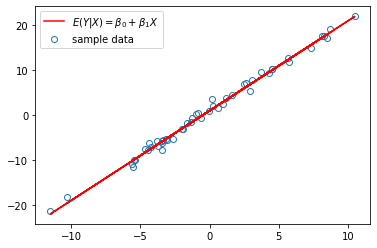

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none', label='sample data')
ax.plot(x, y_ce, linestyle = "-", color = "red", label='$E(Y|X) = \\beta_0 + \\beta_1 X$');
ax.legend(handles = legend_lines, loc = 'upper left');

## Key assumptions in Regression Analysis

線形回帰が正当化される条件は以下、

### (UR.1)
The Data Generating Process (DGP), or in other words, the population, is described by a linear (in terms of the coefficients) model:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

### (UR.2)

The error term $\epsilon$ has an expected value of zero, given any value of the explanatory variable:

$$
\mathbb{E}(\epsilon_i| X_j) = 0,\ \forall i,j = 1,...,N
$$

### (UR.3)

The error term $\epsilon$ has the same variance given any value of the explanatory variable (i.e. homoskedasticity):

$$
\mathbb{V}{\rm ar} (\epsilon_i | \mathbf{X} ) = \sigma^2_\epsilon,\ \forall i = 1,..,N
$$

heteroskedasticityでも線形回帰は正当化されるが、ここでは一般的な仮定に準っておく。

### (UR.4)
the error terms are not correlated across observations (i.e. no autocorrelation):

$$
\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j) = 0,\ i \neq j
$$

(UR.3), (UR.4)より

$$
\mathbb{V}{\rm ar}\left( \boldsymbol{\varepsilon} | \mathbf{X} \right) =
\begin{bmatrix}
\mathbb{V}{\rm ar} (\epsilon_1) & \mathbb{C}{\rm ov} (\epsilon_1, \epsilon_2) & ... & \mathbb{C}{\rm ov} (\epsilon_1, \epsilon_N) \\
\mathbb{C}{\rm ov} (\epsilon_2, \epsilon_1) & \mathbb{V}{\rm ar} (\epsilon_2) & ... & \mathbb{C}{\rm ov} (\epsilon_2, \epsilon_N) \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{C}{\rm ov} (\epsilon_N, \epsilon_1) & \mathbb{C}{\rm ov} (\epsilon_N, \epsilon_2) & ... & \mathbb{V}{\rm ar} (\epsilon_N)
\end{bmatrix} =
\sigma^2_\epsilon  \mathbf{I}
$$

### (UR.5)
$$
rank(X) = k, \text{ where } X \text{ is } n\times k \text{ matrix} 
$$


### (UR.6) optional
The residuals are normal:
$$
\boldsymbol{\varepsilon} | \mathbf{X} \sim \mathcal{N} \left( \mathbf{0}, \sigma^2_\epsilon \mathbf{I} \right)
$$

## Derivation of the Ordinary Least Squares 

ここでは上の(UR.1), (UR.2), (UR.3), (UR.4)を満たしていると仮定する。

$$
\begin{cases}
\mathbb{E}(\epsilon) &= 0 \\
\mathbb{E}(X'\epsilon) &= 0 \\
\epsilon &= Y - X\beta
\end{cases}
$$
Then,

$$
\begin{cases}
\mathbb{E}(Y - X\beta) &= 0 \\
\mathbb{E}(X' (Y - X\beta)) &= 0
\end{cases}
$$
Thus,

$$
\beta = E[X'X]^{-1}E[X'Y]
$$

And, the sample analogue is

$$
\hat\beta = [X'X]^{-1}(X'Y)
$$

#### Bivariate modelの場合

$$
\begin{equation}
\begin{cases}
\dfrac{1}{N} \sum_{i = 1}^N \left[Y_i - \widehat{\beta}_0 - \widehat{\beta}_1 X_i \right] &= 0 \\\\
\dfrac{1}{N} \sum_{i = 1}^N \left[X_i \left(Y_i - \widehat{\beta}_0 - \widehat{\beta}_1 X_i \right) \right] &= 0
\end{cases}
\end{equation}
$$

Then,

$$
\begin{equation}
\widehat{\beta}_0 = \overline{Y} - \widehat{\beta}_1 \overline{X}
\end{equation}
$$

which gives us

$$
\sum_{i = 1}^N X_i\left( Y_i - \overline{Y} + \widehat{\beta}_1 \overline{X}- \widehat{\beta}_1 X_i \right) = 0 \Longrightarrow \sum_{i = 1}^N X_i\left( Y_i - \overline{Y} \right) = \widehat{\beta}_1 \sum_{i = 1}^N X_i\left( X_i - \overline{X} \right)
$$

and

$$
\widehat{\beta}_1 = \dfrac{\sum_{i = 1}^N X_i\left( Y_i - \overline{Y} \right)}{\sum_{i = 1}^N X_i\left( X_i - \overline{X} \right)}
$$

さらに

$$
\begin{aligned}
\sum_{i = 1}^N X_i\left( X_i - \overline{X} \right) &= \sum_{i = 1}^N \left( X_i - \overline{X} \right)^2 \\
\sum_{i = 1}^N X_i\left( Y_i - \overline{Y} \right) &= \sum_{i = 1}^N \left( X_i - \overline{X} \right) \left( Y_i - \overline{Y} \right)
\end{aligned}
$$

そして、以下のように理解することもできる

$$
\begin{equation}
\widehat{\beta}_1 = \dfrac{\sum_{i = 1}^N \left( X_i - \overline{X} \right) \left( Y_i - \overline{Y} \right)}{\sum_{i = 1}^N \left( X_i - \overline{X} \right)^2} = \dfrac{\widehat{\mathbb{C}{\rm ov}}(X, Y)}{\widehat{\mathbb{V}{\rm ar}}(X)}
\end{equation}
$$

### System of Partial Derivatives Method
$$
RSS = \epsilon'\epsilon = (Y - X\beta)'(Y - X\beta)
$$

Then,

$$
\begin{aligned}
\frac{\partial RSS}{\partial \beta} =  - 2(X'Y) +  2(X'X)\beta = 0
\end{aligned}
$$

Then,

$$
\begin{cases}
\widehat{\beta}_1 = \dfrac{\sum_{i = 1}^N \left( X_i - \overline{X} \right) \left( Y_i - \overline{Y} \right)}{\sum_{i = 1}^N \left( X_i - \overline{X} \right)^2} = \dfrac{\widehat{\mathbb{C}{\rm ov}}(X, Y)}{\widehat{\mathbb{V}{\rm ar}}(X)} \\\\
\widehat{\beta}_0 = \overline{Y} - \widehat{\beta}_1 \overline{X}
\end{cases}
$$

## PythonとOLS
データの生成

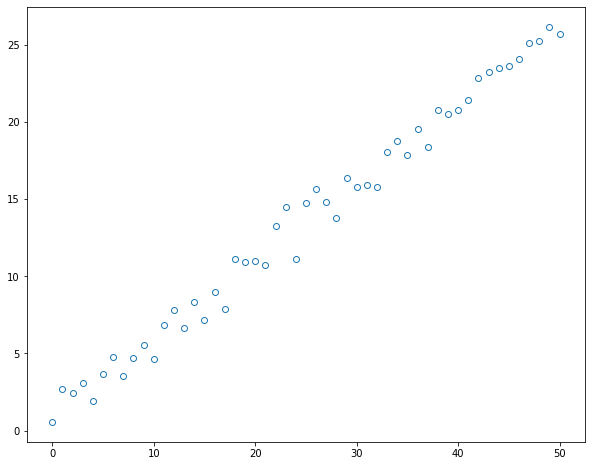

In [16]:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1)
#x = list(range(0, N + 1)) # not np.ndarray 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Plot the data
plt.figure(num = 0, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none');

In [37]:
beta_1_est = np.cov(x, y, bias = False)[0][1] / np.var(x, ddof = 1)
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("Estimated beta_0 = " + str(beta_0_est) + ". True beta_0 = " + str(beta_0))

Estimated beta_0 = 0.908378099796689. True beta_0 = 1


In [38]:
print("Estimated beta_1 = " + str(beta_1_est) + ". True beta_1 = " + str(beta_1))

Estimated beta_1 = 0.5067416051292871. True beta_1 = 0.5


matrixを用いた解き方

In [42]:
x_mat = np.column_stack((np.ones(len(x)), x))
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), 
                  np.dot(np.transpose(x_mat), y))
print(beta_mat)

[0.9083781  0.50674161]


statsmodelを用いる場合

In [43]:
import statsmodels.api as sm
#
x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Create the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.params)   

[0.9083781  0.50674161]


plotしてみる

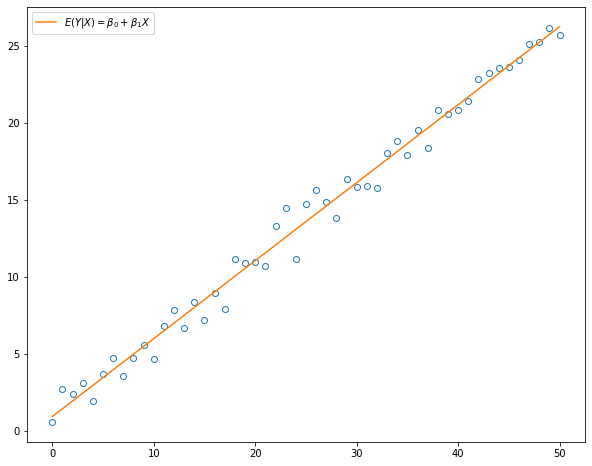

In [46]:
plt.figure(num = 0, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.plot(x, beta_mat[0] + beta_mat[1]*x, label = '$E(Y|X) = \\beta_0 + \\beta_1 X$')
plt.legend();

Text(17.82, 10.975383044124221, '')

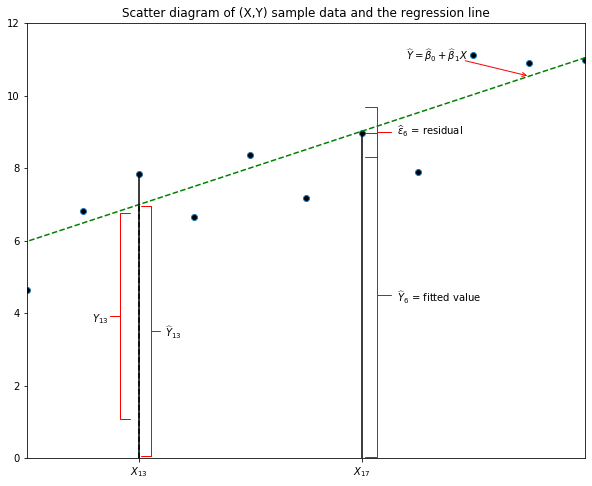

In [55]:
y_fit = beta_mat[0] + beta_mat[1]*x

plt.figure(num = 1, figsize=(10, 8))
plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'black')
plt.ylim(ymin = 0, ymax = 12)
plt.xlim(xmin = 10, xmax = 20)
plt.title("Scatter diagram of (X,Y) sample data and the regression line")
plt.plot(x, beta_mat[0] + beta_mat[1]*x, linestyle = "--", color = "green")

# Add Axis labels and ticks at specific positions:
plt.xticks([x[12], x[16]], ["$X_{13}$", "$X_{17}$"])
# Add vertical lines:
plt.plot([x[12], x[12]], [0, y_fit[12]], '--', color = "black")
plt.plot([x[12], x[12]], [0, y[12]], '-', color = "black")
plt.plot([x[16], x[16]], [0, y[16]], '-', color = "black")


plt.annotate("", xy = (x[12]*0.955, y[12] / 2), 
             xytext = (x[12]*0.975, y[12] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=10.3,lengthA=1",
                               connectionstyle = "arc", color='red'))
plt.annotate("", xy = (x[12]*1.015, y_fit[12] / 2),
             xytext = (x[12]*1.035, y_fit[12] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=12.5,lengthB=1",
                               connectionstyle = "arc", color='red'))
plt.annotate("", xy = (x[16]*1.015, y_fit[16] / 2), 
             xytext = (x[16]*1.035, y_fit[16] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=16.2,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
plt.annotate("", xy = (x[16]*1.015, (y[16] + y_fit[16]) / 2),
             xytext = (x[16]*1.035, (y[16] + y_fit[16]) / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=2.5,lengthB=1.2",
                               connectionstyle = "arc", color='red'))

# Add Actual, Fitted and Residual indicator text:
plt.text(x[12]*0.93, y[12] / 2.1, r'$Y_{13}$', fontsize = 10)
plt.text(x[12]*1.04, y_fit[12] / 2.1, r'$\widehat{Y}_{13}$', fontsize = 10)
plt.text(x[16]*1.04, y_fit[16] / 2.1, 
  r'$\widehat{Y}_6$ = fitted value', fontsize = 10)
plt.text(x[16]*1.04, (y[16] + y_fit[16]) / 2.02, 
  r'$\widehat{\epsilon}_6$ = residual', fontsize = 10)
# Add Regression line
plt.text(x[17] - 0.2, y[20], 
  r'$\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1 X$', fontsize = 10)
plt.annotate("", xy = (x[19], y_fit[19]), xytext = (x[18]*0.99, y[20]),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc", color='red'))

### Residualの性質

In [56]:
residual = y - y_fit

In [57]:
sum(residual)

-1.0080825063596421e-13

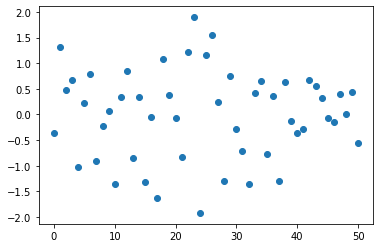

In [60]:
plt.scatter(x, residual);

In [63]:
np.cov(x, residual)[0,1]

1.0111467219076076e-13

In [64]:
np.cov(y_fit, residual)[0,1]

5.116458419229954e-14

## Gauss-Markov theorem

Under the assumption that the conditions (UR.1) - (UR.3), (UR. 5) hold true, the OLS estimators $\beta_{OLS}$ are BLUE (Best Linear Unbiased Estimator) and Consistent.

### OLS estimators are Unbiased

$$
\begin{aligned}
\widehat{\boldsymbol{\beta}} &= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{Y} \\
&= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \left( \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon} \right) \\
&= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} + \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \\
&= \boldsymbol{\beta} + \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} 
\end{aligned}
$$